In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


### HARDCODING THE IMPORT HEKA PATH

In [2]:
# Add heka_reader to PYTHONPATH
import sys
#fpath = '/Users/Fechner/PythonStuff/heka_reader' #initial version delete
fpath = '/Users/Fechner/Dropbox/PythonImport/heka_reader' #MAC
sys.path.append(fpath)
import heka_reader

### got the heka reader from here
https://github.com/campagnola/heka_reader

- clone the repository to your computer (move to directory with terminal commands. Mine here is called PythonStuff at the moment: change name)
    - git clone https://github.com/campagnola/heka_reader.git
- the heka reader enables to read and access the .dat files (to work in jupyter notebook, you habe to append the heka_reader to the path where the heka reader is stored)
- browser.py enables to easily browse for recordings within a .dat comparable to Igor or other similar programs
- I changed the following in my local browser.py version, because the functions output was a tuple:
    - def load_clicked():
    - Display a file dialog to select a .dat file
    - file_name = pg.QtGui.QFileDialog.getOpenFileName()
    - if isinstance(file_name, tuple):   (ADDED THIS LINE)
        -    file_name = file_name[0]    (ADDED THIS LINE)
    - if file_name == '':
        -    return
    - load(file_name)

### Brief example for heka_reader: we changed 

    # Load a .dat file
    bundle = Bundle(file_name)
    
    # Select a trace
    trace = bundle.pul[group_ind][series_ind][sweep_ind][trace_ind]
    
    # Print meta-data for this trace
    print(trace)
    
    # Load data for this trace
    data = bundle.data[group_id, series_id, sweep_ind, trace_ind]

### HARDCODING:
- Choose differen Reprensentive Traces for NaGLu Figure 1
- enter hardcoding part: choose frog ID (e.g. STFX073) and Recording ID (e.g. '001') for each recording condition
- identify series and sweeps per recording and excel sheet

#### change initial directory to datFilesSTFX 

In [3]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX


In [4]:
####### Hardcoding the data path to your device ####
Changefiledir ='/Users/Fechner/Box Sync/Fechner/'

#### doesn't need to be changed for TEVC analysis ###
filedir = Changefiledir + 'TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/MetaDelta/'
filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename
print(filedir)

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/MetaDelta/


In [5]:
####### hardcoding ########## FOR NaGLu FIgure 1 ######
#enter here different IDs
#mg419 = M4d (A713T)
mg419frog = 'STFX075'#'STFX073'
mg419RecNr = '006' #'021'
mg419Series = 8-1 #it's actially the group from heka
#STFX075006
#STFX073021 - group 17  voltage clamp errors


#mg418 = DEGT-1d (A813T)
mg418frog = 'STFX034' 
mg418RecNr = '061'
mg418Series = 19-1
#STFX034061 mean: -7.29E-07; Vrev: -2.02E-02 

#pTL69 = U8d (XXXX) #STFX071-029 nice recording UNC-8d pTL69 meanStart: -1.90E-06
pTL69frog = 'STFX071'
pTL69RecNr = '029' 
pTL69Series = 11-1

#mg512 = MEC-10d (A673V) #STFX071-029 nice recording UNC-8d pTL69 meanStart: -1.90E-06
mg512frog = 'STFX041'
mg512RecNr = '039' 
mg512Series = 5-1
#STFX040034 group 6 has outward current
#STFX041039 mean current -1.45E-07, Vev -3.76E-02

#pTL070 - ADD DEL-1d here
pTL70frog = 'STFX091'#
pTL70RecNr = '009' #
pTL70Series = 17-1


#uninjected
uninjfrog = 'STFX043'
uninjRecNr = '033' 
uninjSeries = 3-1
#STFX043033 -1.45E-07 6.82E-01


In [6]:
pwd

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/datFilesSTFX'

### The text below finds the .datfile belonging to the recording mg419frog/mg419RecNr 

In [7]:
#find filename belonging to recording

mg419filename = 'TEVCMeta'+ mg419frog +'.xlsx'
#mg419Recording = mg419frog + mg419RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
mg419xl = pd.ExcelFile(filedir+mg419filename)#converters={'names':str,'ages':str}
mg419xl.sheet_names
mg419df = mg419xl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
mg419Recording = mg419frog + mg419RecNr

pTL69filename = 'TEVCMeta'+ pTL69frog +'.xlsx'
pTL69xl = pd.ExcelFile(filedir+pTL69filename)#converters={'names':str,'ages':str}
pTL69xl.sheet_names
pTL69df = pTL69xl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
pTL69Recording = pTL69frog + pTL69RecNr

mg418filename = 'TEVCMeta'+ mg418frog +'.xlsx'
mg418xl = pd.ExcelFile(filedir+mg418filename)
mg418xl.sheet_names
mg418df = mg418xl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
mg418Recording = mg418frog + mg418RecNr

mg512filename = 'TEVCMeta'+ mg512frog +'.xlsx'
mg512xl = pd.ExcelFile(filedir+mg512filename)
mg512xl.sheet_names
mg512df = mg512xl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
mg512Recording = mg512frog + mg512RecNr

pTL70filename = 'TEVCMeta'+ pTL70frog +'.xlsx'
pTL70xl = pd.ExcelFile(filedir+pTL70filename)
pTL70xl.sheet_names
pTL70df = pTL70xl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
pTL70Recording = pTL70frog + pTL70RecNr

uninjfilename = 'TEVCMeta'+ uninjfrog +'.xlsx'
uninjxl = pd.ExcelFile(filedir+uninjfilename)
uninjxl.sheet_names
uninjdf = uninjxl.parse("Sheet1",converters={'Filename': np.int64,'ContRamp1550': np.int64,'NaGlu1': np.int64}) #calls for Sheet names 
uninjRecording = uninjfrog + uninjRecNr


#find the .dat file name in the MetaData sheet of the corresponding recording
mg419DatFile = mg419df.Filename[(mg419df.CellID == mg419Recording)]#.values[0] #values[0] gives me the integer directly. no need for iloc
pTL69DatFile = pTL69df.Filename[(pTL69df.CellID == pTL69Recording)]
mg418DatFile = mg418df.Filename[(mg418df.CellID == mg418Recording)]
mg512DatFile = mg512df.Filename[(mg512df.CellID == mg512Recording)]
pTL70DatFile = pTL70df.Filename[(pTL70df.CellID == pTL70Recording)]
uninjDatFile = uninjdf.Filename[(uninjdf.CellID == uninjRecording)]



In [8]:
pTL70DatFile

6    20190916
Name: Filename, dtype: int64

### load dat files


In [9]:
# Load a .dat file
mg419loadFile = heka_reader.Bundle(str(mg419DatFile.iloc[0])+'.dat')
pTL69loadFile = heka_reader.Bundle(str(pTL69DatFile.iloc[0])+'.dat')
mg418loadFile = heka_reader.Bundle(str(mg418DatFile.iloc[0])+'.dat')
mg512loadFile = heka_reader.Bundle(str(mg512DatFile.iloc[0])+'.dat')
pTL70loadFile = heka_reader.Bundle(str(pTL70DatFile.iloc[0])+'.dat')
uninjloadFile = heka_reader.Bundle(str(uninjDatFile.iloc[0])+'.dat')

#add other .dat files too

### ToDo: Figure out how to simplify calculation of mean 

### caculate mean values NaGlu-1 

TODO: How to figure out the series number or access the recordung via the label????

In [10]:
#find the value of the sweep entered in meta data sheet for NaGlu-1
mg419LastSweepNaGlu = mg419df.NaGlu1[(mg419df.CellID == mg419Recording)]
mg419CountRamp = mg419df.ContRamp1550[(mg419df.CellID == mg419Recording)]
### add other cell IDs here, too ####

mg419dataVol1 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
mg419dataVol2 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-2 ,1]
mg419dataVol3 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-3 ,1]

mg419dataCur1 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
mg419dataCur2 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-2 ,0]
mg419dataCur3 = mg419loadFile.data[mg419Series,mg419CountRamp.iloc[0]-1,mg419LastSweepNaGlu.iloc[0]-3 ,0]

mg419dataVol = (mg419dataVol1+mg419dataVol2+mg419dataVol3)/3*1000
mg419dataCur = (mg419dataCur1+mg419dataCur2+mg419dataCur3)/3*1000000


##### calculate for pTL69
#find the value of the sweep entered in meta data sheet for NaGlu-1
pTL69LastSweepNaGlu = pTL69df.NaGlu1[(pTL69df.CellID == pTL69Recording)]
pTL69CountRamp = pTL69df.ContRamp1550[(pTL69df.CellID == pTL69Recording)]

pTL69dataVol1 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
pTL69dataVol2 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-2 ,1]
pTL69dataVol3 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-3 ,1]

pTL69dataCur1 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
pTL69dataCur2 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-2 ,0]
pTL69dataCur3 = pTL69loadFile.data[pTL69Series,pTL69CountRamp.iloc[0]-1,pTL69LastSweepNaGlu.iloc[0]-3 ,0]

pTL69SeriesdataVol = (pTL69dataVol1+pTL69dataVol2+pTL69dataVol3)/3*1000
pTL69SeriesdataCur = (pTL69dataCur1+pTL69dataCur2+pTL69dataCur3)/3*1000000

##### calculate for mg418
#find the value of the sweep entered in meta data sheet for NaGlu-1
mg418LastSweepNaGlu = mg418df.NaGlu1[(mg418df.CellID == mg418Recording)]
mg418CountRamp = mg418df.ContRamp1550[(mg418df.CellID == mg418Recording)]

mg418dataVol1 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
mg418dataVol2 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-2 ,1]
mg418dataVol3 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-3 ,1]

mg418dataCur1 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
mg418dataCur2 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-2 ,0]
mg418dataCur3 = mg418loadFile.data[mg418Series,mg418CountRamp.iloc[0]-1,mg418LastSweepNaGlu.iloc[0]-3 ,0]

mg418SeriesdataVol = (mg418dataVol1+mg418dataVol2+mg418dataVol3)/3*1000
mg418SeriesdataCur = (mg418dataCur1+mg418dataCur2+mg418dataCur3)/3*1000000
mg418Series

##### calculate for mg512
#find the value of the sweep entered in meta data sheet for NaGlu-1
mg512LastSweepNaGlu = mg512df.NaGlu1[(mg512df.CellID == mg512Recording)]
mg512CountRamp = mg512df.ContRamp1550[(mg512df.CellID == mg512Recording)]

mg512dataVol1 = mg512loadFile.data[mg512Series,mg418CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
mg512dataVol2 = mg512loadFile.data[mg512Series,mg418CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-2 ,1]
mg512dataVol3 = mg512loadFile.data[mg512Series,mg418CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-3 ,1]

mg512dataCur1 = mg512loadFile.data[mg512Series,mg512CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
mg512dataCur2 = mg512loadFile.data[mg512Series,mg512CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-2 ,0]
mg512dataCur3 = mg512loadFile.data[mg512Series,mg512CountRamp.iloc[0]-1,mg512LastSweepNaGlu.iloc[0]-3 ,0]

mg512SeriesdataVol = (mg512dataVol1+mg512dataVol2+mg512dataVol3)/3*1000
mg512SeriesdataCur = (mg512dataCur1+mg512dataCur2+mg512dataCur3)/3*1000000
mg512Series

##### calculate for pTL70
#find the value of the sweep entered in meta data sheet for NaGlu-1
pTL70LastSweepNaGlu = pTL70df.NaGlu1[(pTL70df.CellID == pTL70Recording)]
pTL70CountRamp = pTL70df.ContRamp1550[(pTL70df.CellID == pTL70Recording)]

pTL70dataVol1 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
pTL70dataVol2 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-2 ,1]
pTL70dataVol3 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-3 ,1]

pTL70dataCur1 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
pTL70dataCur2 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-2 ,0]
pTL70dataCur3 = pTL70loadFile.data[pTL70Series,pTL70CountRamp.iloc[0]-1,pTL70LastSweepNaGlu.iloc[0]-3 ,0]

pTL70SeriesdataVol = (pTL70dataVol1+pTL70dataVol2+pTL70dataVol3)/3*1000
pTL70SeriesdataCur = (pTL70dataCur1+pTL70dataCur2+pTL70dataCur3)/3*1000000
pTL70Series

##### calculate for uninjected
#find the value of the sweep entered in meta data sheet for NaGlu-1
uninjLastSweepNaGlu = uninjdf.NaGlu1[(uninjdf.CellID == uninjRecording)]
uninjCountRamp = uninjdf.ContRamp1550[(uninjdf.CellID == uninjRecording)]

uninjdataVol1 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-1 ,1]# remember python nomenclature
uninjdataVol2 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-2 ,1]
uninjdataVol3 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-3 ,1]

uninjdataCur1 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-1 ,0]# remember python nomenclature
uninjdataCur2 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-2 ,0]
uninjdataCur3 = uninjloadFile.data[uninjSeries,uninjCountRamp.iloc[0]-1,uninjLastSweepNaGlu.iloc[0]-3 ,0]

uninjSeriesdataVol = (uninjdataVol1+uninjdataVol2+uninjdataVol3)/3*1000
uninjSeriesdataCur = (uninjdataCur1+uninjdataCur2+uninjdataCur3)/3*1000000
uninjSeries

2

In [11]:
pTL70LastSweepNaGlu

6    12
Name: NaGlu1, dtype: int64

In [12]:
mg419CountRamp.iloc[0]-1

2

In [13]:
colorM4 = (0.30, 0.69, 0.29)
colorU8 = (0.60, 0.31,0.64)
colorDT1 = (0.89, 0.11,0.10)
colorM10 = (1, 0.50,0)
colorDel1 = (0.22,0.49,0.72)
coloruninj = (0.00, 0.00, 0.00)
#colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]



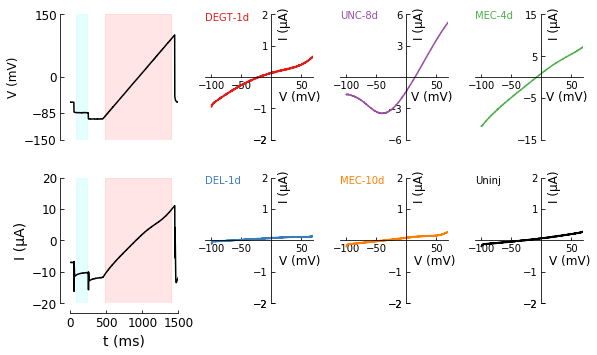

In [14]:
fig = plt.figure(figsize=(9.5, 5.5)) 
#plt.subplots(2, 2, sharex='col')

#### Voltage
ax1 = plt.subplot(2,4,1)
plt.plot(mg419dataVol, 'black')

#### Current
ax8 = plt.subplot(2,4,5)
plt.plot(mg419dataCur, 'black')

#### MEC-4
ax2 = plt.subplot(2,4,4)
plt.plot(mg419dataVol[450:1449],mg419dataCur[450:1449], color= colorM4,label="MEC-4d")

#### UNC-8
ax3 = plt.subplot(2,4,3)
plt.plot(pTL69SeriesdataVol[450:1449],pTL69SeriesdataCur[450:1449], color = colorU8,label="UNC-8d")
#plt.plot(pTL69SeriesdataCur,pTL69SeriesdataVol) # find which values 

#### DEGT-1
ax4 = plt.subplot(2,4,2)
plt.plot(mg418SeriesdataVol[450:1449], mg418SeriesdataCur[450:1449], color=colorDT1, label='DEGT-1d')

#### DEL-1d
ax5 = plt.subplot(2,4,6)
plt.plot(pTL70SeriesdataVol[450:1449], pTL70SeriesdataCur[450:1449], color=colorDel1, label='DEL-1d')

#### MEC-10
ax6 = plt.subplot(2,4,7)
plt.plot(mg512SeriesdataVol[450:1449],mg512SeriesdataCur[450:1449], color= colorM10,label='MEC-10d')

#### Uninjected
ax7 = plt.subplot(2,4,8)
plt.plot(uninjSeriesdataVol[450:1449],uninjSeriesdataCur[450:1449], color=coloruninj,label='Uninj')



##### Voltage 
ax1.set_ylim([-150, 150])
ax1.set_xlim([0, 1500])
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)                                     # no spine at the top
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax1.tick_params(axis='both', which='major', labelsize=12)  
#ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
ax1.set_yticks([-150,-85,0,150])
ax1.set_xticks([0,500, 1000, 1500])
ax1.set_xlabel('t (ms)',fontsize=12)
ax1.set_ylabel('V (mV)',fontsize=12)
ax1.axvspan(75, 225, color='cyan', alpha=0.1)
ax1.axvspan(475, 1400, color='red', alpha=0.1)
#ax1.set_title('Voltage Step protocol',size=12)
ax1.spines['bottom'].set_visible(False) 
ax1.xaxis.set_visible(False)
#ax1.spines['left'].set_visible(False) 
#ax1.yaxis.set_visible(False)
#ax1.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax1.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)


##### Current
ax8.set_ylim([-20, 20])
ax8.set_xlim([0, 1500])
ax8.spines['right'].set_visible(False)                                  # no spine at the right
ax8.spines['top'].set_visible(False)                                     # no spine at the top
ax8.yaxis.set_ticks_position('left')                                     # ticks at the left
ax8.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax8.spines['left'].set_position(('outward',10))                           # a spine at the left that is put a little aside
ax8.spines['bottom'].set_position(('outward',10))  
ax8.spines['top'].set_position(('axes',5)) 
ax8.get_yaxis().set_tick_params(direction='in')
ax8.get_xaxis().set_tick_params(direction='in')
#ax1.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
ax8.tick_params(axis='both', which='major', labelsize=12)  
#ax1.annotate('ramp',xy=(125, 300), xycoords='figure points')#FIGURE Poitns: default coordinates
#ax8.set_yticks([-150,-85,0,150])
ax8.set_xticks([0,500, 1000, 1500])
ax8.set_xlabel('t (ms)',fontsize=14)
ax8.set_ylabel('I (µA)',fontsize=14)
ax8.axvspan(75, 225, color='cyan', alpha=0.1)
ax8.axvspan(475, 1400, color='red', alpha=0.1)




##### AXIS 2####
#### MEC-4
ax2.set_ylim([-15, 15])
ax2.spines['right'].set_visible(False)                                  # no spine at the right
ax2.spines['top'].set_visible(False)                                     # no spine at the top
ax2.yaxis.set_ticks_position('left')                                     # ticks at the left
ax2.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax2.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax2.spines['bottom'].set_position('zero') 
ax2.spines['top'].set_position(('axes',5)) 
ax2.get_yaxis().set_tick_params(direction='in')
ax2.get_xaxis().set_tick_params(direction='in')
#ax2.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax2.set_title('MEC-4d (A713T)',size=14)
#ax2.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax2.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax2.set_xlim([-110,70])
ax2.set_xticks([-100,-50,50])
ax2.set_yticks([-15,-5,5,15])
ax2.set_xlabel('V (mV)',fontsize=12)
ax2.set_ylabel('I (µA)',fontsize=12)
ax2.xaxis.set_label_coords(0.85,0.39)
ax2.yaxis.set_label_coords(0.79,0.93)
ax2.tick_params(axis='both', which='major', labelsize=10)  
#ax2.legend(bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)
ax2.text(-110, 14, 'MEC-4d', color=colorM4)

##### AXIS 3#### 
#### UNC-8
ax3.set_ylim([-6,6])
ax3.spines['right'].set_visible(False)                                  # no spine at the right
ax3.spines['top'].set_visible(False)                                     # no spine at the top
ax3.yaxis.set_ticks_position('left')                                     # ticks at the left
ax3.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax3.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax3.spines['bottom'].set_position('zero') 
ax3.spines['top'].set_position(('axes',5)) 
ax3.get_yaxis().set_tick_params(direction='in')
ax3.get_xaxis().set_tick_params(direction='in')
#ax3.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1          
#ax3.set_title('UNC-8d (G378E)',size=14)
#ax3.set_xticklabels(np.unique(AmilAll30['Injection']),rotation=30)
#ax3.set_xticklabels(["MEC-4d","UNC-8d","DEGT-1d","uninjected"],rotation=30)
ax3.set_xlim([-110,70])
ax3.set_xticks([-100,-50,50])
ax3.set_yticks([-6,-3,3,6])
ax3.set_xlabel('V (mV)',fontsize=12)
ax3.set_ylabel('I (µA)',fontsize=12)
ax3.xaxis.set_label_coords(0.85,0.39)
ax3.yaxis.set_label_coords(0.79,0.93)
ax3.tick_params(axis='both', which='major', labelsize=10) 
#ax3.legend(bbox_to_anchor=(0.4, 0.3, 0.11, 0.78),frameon=False)
ax3.text(-110, 5.6, 'UNC-8d', color=colorU8)


##### AXIS 4####
#### DEGT-1
#ax4.set_ylim([-1, 1])
ax4.set_yticks([-2,-2,-1,1,2])
ax4.set_xlim([-100, 100])
ax4.spines['right'].set_visible(False)                                  # no spine at the right
ax4.spines['top'].set_visible(False)                                     # no spine at the top
ax4.yaxis.set_ticks_position('left')                                     # ticks at the left
ax4.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax4.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax4.spines['bottom'].set_position('zero')  
ax4.spines['top'].set_position(('axes',5)) 
ax4.get_yaxis().set_tick_params(direction='in')
ax4.get_xaxis().set_tick_params(direction='in')
#ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax4.set_title('ADD DEL-1d',size=14, color = 'red')
ax4.set_xlim([-110,70])
ax4.set_xticks([-100,-50,50])
ax4.set_xlabel('V (mV)',fontsize=12)
ax4.set_ylabel('I (µA)',fontsize=12)
ax4.xaxis.set_label_coords(0.87,0.39)
ax4.yaxis.set_label_coords(0.79,0.93)
ax4.tick_params(axis='both', which='major', labelsize=10)  
#ax4.legend(bbox_to_anchor=(0.48, 0.3, 0.11, 0.78),frameon=False)
ax4.text(-110, 1.8, 'DEGT-1d',color=colorDT1)

##### AXIS 5####
#### DEL-1
#ax5.set_ylim([-1, 1])
ax5.set_yticks([-2,-2,-1,1,2])
ax5.set_xlim([-100, 100])
ax5.spines['right'].set_visible(False)                                  # no spine at the right
ax5.spines['top'].set_visible(False)                                     # no spine at the top
ax5.yaxis.set_ticks_position('left')                                     # ticks at the left
ax5.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax5.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax5.spines['bottom'].set_position('zero')  
ax5.spines['top'].set_position(('axes',5)) 
ax5.get_yaxis().set_tick_params(direction='in')
ax5.get_xaxis().set_tick_params(direction='in')
#ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax4.set_title('ADD DEL-1d',size=14, color = 'red')
ax5.set_xlim([-110,70])
ax5.set_xticks([-100,-50,50])
ax5.set_xlabel('V (mV)',fontsize=12)
ax5.set_ylabel('I (µA)',fontsize=12)
ax5.xaxis.set_label_coords(0.87,0.39)
ax5.yaxis.set_label_coords(0.79,0.93)
ax5.tick_params(axis='both', which='major', labelsize=10)  
#ax5.legend(bbox_to_anchor=(0.48, 0.3, 0.11, 0.78),frameon=False)
ax5.text(-110, 1.8, 'DEL-1d',color=colorDel1)

##### AXIS 6####
#### MEC-10
#ax6.set_ylim([-1, 1])
ax6.set_yticks([-2,-2,-1,1,2])
ax6.set_xlim([-100, 100])
ax6.spines['right'].set_visible(False)                                  # no spine at the right
ax6.spines['top'].set_visible(False)                                     # no spine at the top
ax6.yaxis.set_ticks_position('left')                                     # ticks at the left
ax6.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax6.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax6.spines['bottom'].set_position('zero')  
ax6.spines['top'].set_position(('axes',5)) 
ax6.get_yaxis().set_tick_params(direction='in')
ax6.get_xaxis().set_tick_params(direction='in')
#ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax4.set_title('ADD DEL-1d',size=14, color = 'red')
ax6.set_xlim([-110,70])
ax6.set_xticks([-100,-50,50])
ax6.set_xlabel('V (mV)',fontsize=12)
ax6.set_ylabel('I (µA)',fontsize=12)
ax6.xaxis.set_label_coords(0.87,0.39)
ax6.yaxis.set_label_coords(0.79,0.93)
ax6.tick_params(axis='both', which='major', labelsize=10)  
#ax6.legend(bbox_to_anchor=(0.48, 0.3, 0.11, 0.78),frameon=False)
ax6.text(-110, 1.8, 'MEC-10d',color=colorM10)


##### AXIS 7####
#### Uninjected
#ax7.set_ylim([-1, 1])
ax7.set_xlim([-100, 100])
ax7.spines['right'].set_visible(False)                                  # no spine at the right
ax7.spines['top'].set_visible(False)                                     # no spine at the top
ax7.yaxis.set_ticks_position('left')                                     # ticks at the left
ax7.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax7.spines['left'].set_position('zero')                           # a spine at the left that is put a little aside
ax7.spines['bottom'].set_position('zero')  
ax7.spines['top'].set_position(('axes',5)) 
ax7.get_yaxis().set_tick_params(direction='in')
ax7.get_xaxis().set_tick_params(direction='in')
#ax4.plot([-1,20], [0,0] , 'k--', color='#000000', linewidth=1)#gray line for Zero or 1        
#ax4.set_title('ADD DEL-1d',size=14, color = 'red')
ax7.set_xlim([-110,70])
ax7.set_xticks([-100,-50,50])
ax7.set_yticks([-2,-2,-1,1,2])
ax7.set_xlabel('V (mV)',fontsize=12)
ax7.set_ylabel('I (µA)',fontsize=12)
ax7.xaxis.set_label_coords(0.87,0.39)
ax7.yaxis.set_label_coords(0.79,0.93)
ax7.tick_params(axis='both', which='major', labelsize=10)  
#ax7.legend(bbox_to_anchor=(0.35, 0.3, 0.11, 0.78),frameon=False)
ax7.text(-110, 1.8, 'Uninj',color=coloruninj)


#plt.ylabel('Change in current', fontsize=16) 
#plt.xlabel('DEG/ENaC/ASIC subunits', fontsize=16)

plt.gcf().subplots_adjust(bottom=0.15, left=0.15,hspace=.3, wspace=0.25) 
#plt.savefig(filedir+"Fig1-NaGlu-IVcurves"+'.jpg')
#plt.savefig(filedir+"Fig1-NaGlu-IVcurves"+'.eps')
plt.savefig(filedirManuscript+"Fig1-NaGlu-RepresentativeTraces"+'.pdf')
#plt.savefig('/Users/Fechner/Dropbox/Manuscript_Pharmacology_DEGENACASIC⁩/FiguresManuscript⁩/Fig1/'+"Fig1-NaGlu-IVcurves"+'.jpg')
#Dropbox⁩ ▸ ⁨ManuscriptPharmacologyDEGENACASIC⁩ ▸ ⁨FiguresManuscript⁩
plt.show()

In [15]:
filedir

'/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/MetaDataSTFX/MetaDelta/'

In [16]:
plt.plot(dataCur)
#plt.axis([0, 6, 0, 20])
plt.show()

NameError: name 'dataCur' is not defined

### GUTTER

In [ ]:
#test = LastSweepNaGlu.values.tolist() #taht works and makes a list

In [ ]:
#delete this part
#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui
#either choose a cetain file or open dialog box
#certain file

#filename = 'TEVCMeta'+ frog + '.xlsx'
#Recording = frog + RecNr #maybe trouble with - in .dat file. matlab ignored all of them. hekareader not
#open dialog box
#filename = filedialog.askopenfilename() #creates filename and directory. TODO: write conditional sentence
#root.update() # necessary in Mac(?) to close the dialog box

In [ ]:
#DELETE
#pandas environment
#xl = pd.ExcelFile(filedir+filename)
#xl.sheet_names
#df = xl.parse("Sheet1") #calls for Sheet names 

#df.head()
#find the .dat file name in the MetaData sheet of the corresponding recording
#DatFile = df.Filename[(df.CellID == Recording)]#.values[0] values[0] gives me the integer directly. no need for iloc
#print(DatFile)

In [ ]:
#df.pivot(columns='InjectionMix', values='Rating').describe().T #check data for which Injections have been used

In [ ]:
# Load a .dat file
#loadFile = heka_reader.Bundle(str(DatFile.iloc[0])+'.dat')

In [ ]:
# trace 
#traceCurrent = loadFile.pul[0][1][10][0]
#traceVoltage = loadFile.pul[0][1][10][1]

In [ ]:
# str(DatFile.iloc[0])+'.dat'